In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score

Get benchmark performance

In [2]:
df = pd.read_csv('data/data_arima.csv', index_col=1)[['mood', 'benchmark']] ## todo change: do data that RF uses
df = df[~df.mood.isna() & ~df.benchmark.isna()] ## todo: remove after using data that RF uses
benchmark = df.groupby('id').apply(lambda x: mean_squared_error(x['mood'], x['benchmark'])).to_frame('mse')
benchmark['r2'] = df.groupby('id').apply(lambda x: r2_score(x['mood'], x['benchmark']))
benchmark

,mse,r2
id,,
AS14.01,0.320932,0.057023
AS14.02,0.940653,-0.268940
AS14.03,0.183846,-0.360623
AS14.05,0.543088,0.233880
AS14.06,0.576570,-1.128706
AS14.07,2.344444,-0.731458
AS14.08,0.406184,-0.342819
AS14.09,0.620049,-0.329492
AS14.12,0.463077,-0.824077


Compare the results from:
- Random forest
- Arima
- LSTM
- Benchmark

In [3]:
arima = pd.read_csv('results/arima_final.csv',index_col=0)
arima.index.rename('id', inplace=True)
#rf = 
#lstm = 

print(f'ARIMA: mean MSE is \t{arima["mse"].mean()}\t with std of MSE of {arima["mse"].std()}\t and mean r2\t {arima["r2"].mean()}')
print(f'Benchmark: mean MSE is \t{benchmark["mse"].mean()}\t with std of MSE of {benchmark["mse"].std()}\t and mean r2\t {benchmark["r2"].mean()}')

ARIMA: mean MSE is 	0.30789154208311365	 with std of MSE of 0.2923561063440708	 and mean r2	 -0.06337258859073247
Benchmark: mean MSE is 	0.574287111192899	 with std of MSE of 0.4308188003510414	 and mean r2	 -0.5626643851415392


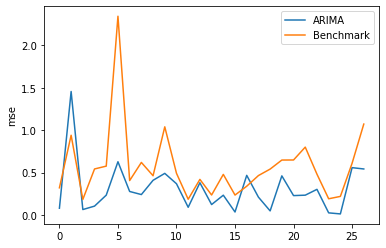

In [4]:
amt_persons = len(benchmark)
sns.lineplot(x=range(0, amt_persons), y= arima['mse'], label="ARIMA")
sns.lineplot(x=range(0, amt_persons), y= benchmark['mse'], label="Benchmark")

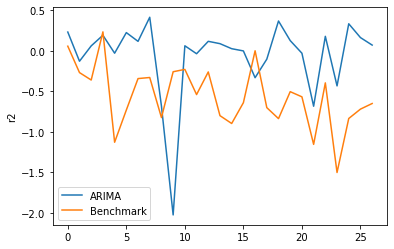

In [5]:
amt_persons = len(benchmark)
sns.lineplot(x=range(0, amt_persons), y= arima['r2'], label="ARIMA")
sns.lineplot(x=range(0, amt_persons), y= benchmark['r2'], label="Benchmark")

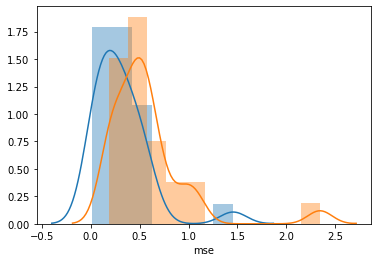

In [6]:
sns.distplot(arima['mse'], label="ARIMA")
sns.distplot(benchmark['mse'], label="Benchmark")

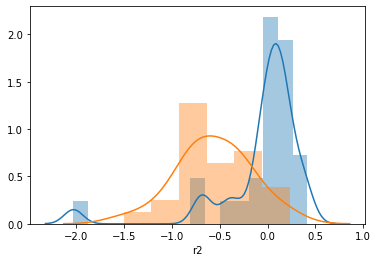

In [7]:
sns.distplot(arima['r2'], label="ARIMA")
sns.distplot(benchmark['r2'], label="Benchmark")